<a href="https://colab.research.google.com/github/amenem/test/blob/master/EDA_FakeNotFake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Get Kaggle data in Colab**

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
import warnings  
warnings.filterwarnings('ignore')    

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"amenem","key":"f0913597f85de0138806c77add36fa0f"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c fake-news

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
submit.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip ./train.csv.zip -d ./

Archive:  ./train.csv.zip
replace ./train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
! unzip ./test.csv.zip -d ./

Archive:  ./test.csv.zip
replace ./test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import os
os.chdir('/content/drive/My Drive/')

**Lets start on Analyzing data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from nltk import tokenize
import nltk
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
df_train= pd.read_csv('./train.csv')

In [6]:
df_train.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [7]:
df_train

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
#Check missing value numbers
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

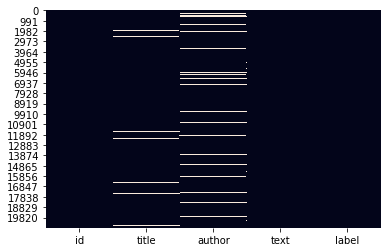

In [10]:
#visualize these miissing value numbers
sb.heatmap(df_train.isnull(),cbar=False)

In [13]:
# no unique authors
len(df_train['author'].unique())

4202

In [11]:
df_train['author'][df_train['label']==1].value_counts()

admin                      193
Pakalert                    86
Eddy Lavine                 85
Starkman                    84
Gillian                     82
                          ... 
Posted At Am On October      1
Thaddeus Russell             1
Phyllis Bentley              1
Jhayla Walls                 1
Goldbugger                   1
Name: author, Length: 1981, dtype: int64

In [12]:
df_train['author'][df_train['label']==0].value_counts()

Pam Key                                                  242
Jerome Hudson                                            166
Charlie Spiering                                         141
John Hayward                                             140
Katherine Rodriguez                                      124
                                                        ... 
Adam Nagourney and Jonathan Martin                         1
Sen. Ted Cruz (R-TX)                                       1
Paul Elie                                                  1
Matthew Rosenberg, Adam Goldman and Emmarie Huetteman      1
Annie Stoltie                                              1
Name: author, Length: 2225, dtype: int64

In [15]:
#unrealiable authors
unr_auth = df_train['author'][df_train['label']==1].to_frame()
#reliable authors
rel_auth = df_train['author'][df_train['label']==0].to_frame()

Text(0.5, 0, 'reliable_authors')

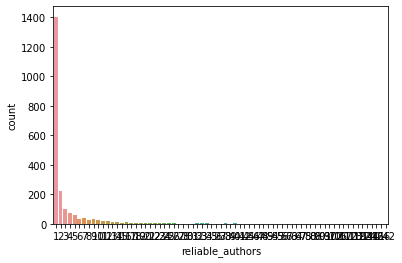

In [16]:
sb.countplot(df_train['author'][df_train['label']==0].value_counts())
plt.xlabel('reliable_authors')

Text(0.5, 0, 'unreliable_authors')

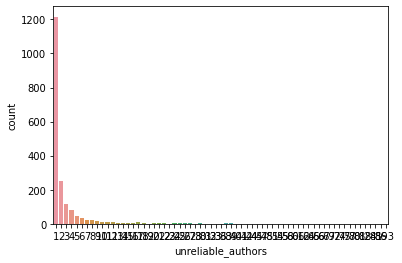

In [17]:
sb.countplot(df_train['author'][df_train['label']==1].value_counts())
plt.xlabel('unreliable_authors')

clearly in both scenarios (reliable and unreliable), some authors dominate in writing those articles.(governed by power law)

**Lets check how many authors have published both kinds**

In [ ]:
com_auth=pd.concat([unr_auth,rel_auth], axis=1, join='inner')

In [ ]:
com_auth

,author,author


Author either writes reliable or unreliable articles

**Check Actual texts**

In [21]:
unr_data = data[data['label']==1]
rel_data = data[data['label']==0]

In [22]:
#unreliable text
unr_text=unr_data['text'].values
#reliable text
rel_text = rel_data['text'].values

In [23]:
unr_text[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [24]:
unr_text[1]

'Why the Truth Might Get You Fired October 29, 2016 \nThe tension between intelligence analysts and political policymakers has always been between honest assessments and desired results, with the latter often overwhelming the former, as in the Iraq War, writes Lawrence Davidson. \nBy Lawrence Davidson \nFor those who might wonder why foreign policy makers repeatedly make bad choices, some insight might be drawn from the following analysis. The action here plays out in the United States, but the lessons are probably universal. \nBack in the early spring of 2003, George W. Bush initiated the invasion of Iraq. One of his key public reasons for doing so was the claim that the country’s dictator, Saddam Hussein, was on the verge of developing nuclear weapons and was hiding other weapons of mass destruction. The real reason went beyond that charge and included a long-range plan for “regime change” in the Middle East. President George W. Bush and Vice President Dick Cheney receive an Oval Off

In [25]:
unr_text[2]

'Videos 15 Civilians Killed In Single US Airstrike Have Been Identified The rate at which civilians are being killed by American airstrikes in Afghanistan is now higher than it was in 2014 when the US was engaged in active combat operations.   Photo of Hellfire missiles being loaded onto a US military Reaper drone in Afghanistan by Staff Sgt. Brian Ferguson/U.S. Air Force. \nThe Bureau has been able to identify 15 civilians killed in a single US drone strike in Afghanistan last month – the biggest loss of civilian life in one strike since the attack on the Medecins Sans Frontieres hospital (MSF) last October. \nThe US claimed it had conducted a “counter-terrorism” strike against Islamic State (IS) fighters when it hit Nangarhar province with missiles on September 28. But the next day the United Nations issued an unusually rapid and strong statement saying the strike had killed 15 civilians and injured 13 others who had gathered at a house to celebrate a tribal elder’s return from a pil

After going thru above examples, I see its about US politics, talking about Hillary Clinton emails, Iraq war, terrorism etc.

We can use Topic modelling to understand bit more about the variations of content of the texts.

**Perform Topic Modelling**

In [19]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
#tokenize texts spacy parser
def tokenize_text(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

def prepare_text_for_lda(text):
    ## restrict tokens with length less than 4 and which are stop words
    tokens = tokenize_text(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens
  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Get Topics from Unreliable(fake) texts

In [26]:
def is_nan(x):
    #check for null
    return (x != x)

text_data=[]
#unreliable articles
articles = unr_text
for line in articles:
    if not is_nan(line):
      tokens = prepare_text_for_lda(line)
      text_data.append(tokens)

from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(0, '0.006*"people" + 0.006*"world" + 0.004*"would" + 0.004*"system"')
(1, '0.010*"russia" + 0.009*"state" + 0.007*"government" + 0.007*"russian"')
(2, '0.024*"trump" + 0.020*"clinton" + 0.014*"hillary" + 0.011*"election"')
(3, '0.003*"pasaportes" + 0.001*"будет" + 0.001*"pasaporte" + 0.001*"migraciones"')
(4, '0.009*"email" + 0.005*"clinton" + 0.005*"police" + 0.005*"state"')


In [ ]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

I have modelled the data in 5 Topics.For unreliable texts(fake news) 


*   Topic 1: talks about war in Syria, which involves US and Russia
*   Topic 2: Is about Elections and talks about Republican and democrats
*   Topic 3: Appears to talk about social issues
*   Topic 4: Govt take on water, public health, market and companies.
*   Topic 5: This topic is built around news in russian language. 

I can see fake news are mainly on US politics involving Donald Trump, and Hillary clinton (eg regarding her emails )






In [ ]:
### Reliable news

In [27]:
def is_nan(x):
    return (x != x)

text_data=[]
articles = rel_text
for line in articles:
    if not is_nan(line):
      tokens = prepare_text_for_lda(line)
      text_data.append(tokens)

from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(0, '0.011*"company" + 0.007*"would" + 0.006*"percent" + 0.006*"people"')
(1, '0.005*"first" + 0.005*"would" + 0.004*"people" + 0.004*"woman"')
(2, '0.012*"state" + 0.008*"unite" + 0.008*"country" + 0.007*"government"')
(3, '0.038*"trump" + 0.014*"president" + 0.009*"republican" + 0.009*"would"')
(4, '0.011*"police" + 0.010*"state" + 0.009*"court" + 0.007*"officer"')


In [ ]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

Reliable news also talks about US politics , its take on Syria, relation with Russia and China. there is less mentioning of Hillary clinton and her email controversy. Also there are no russian news.

Now we have better understading of content of texts now lets get stats on sentences and word frequencies and distribution

In [28]:
df_train=df_train.dropna(subset=['text'])

In [29]:
data.shape

(20800, 5)

In [30]:
df_train['label'].value_counts()

0    10387
1    10374
Name: label, dtype: int64

In [31]:
## looks balanced data

In [33]:
##sentence stats
from nltk import tokenize
word_lens=[]
list_sent_sequences=[]
sent_lens =[]
texts=[]
for idx in range(df_train.shape[0]):
  sentences=tokenize.sent_tokenize(df_train['text'].iloc[idx])
  tokenized_sents=[]
  for sent in sentences:
    tokens = prepare_text_for_nn(sent)
    texts.append(tokens)
    word_lens.append(len(tokens))
    tokenized_sents.append(tokens)
  sent_lens.append(len(sentences))
  list_sent_sequences.append(tokenized_sents)


Text(0.5, 0, 'Average Sentence length')

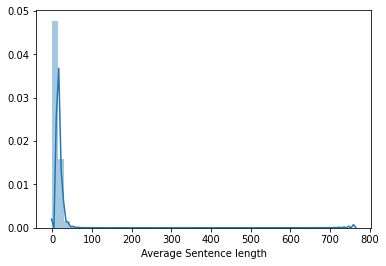

In [38]:
sb.distplot(word_lens)
plt.xlabel('Average Sentence length')

Text(0.5, 0, 'No of Sentences')

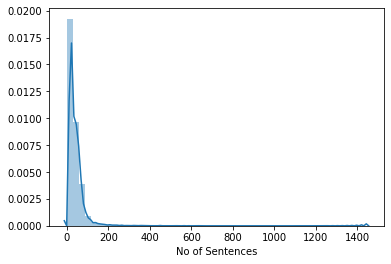

In [37]:
sb.distplot(sent_lens)
plt.xlabel('No of Sentences')